In [1]:
%pip install somepackage
import sys; print(sys.executable)

Note: you may need to restart the kernel to use updated packages.
/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/bin/python


In [2]:
%pip install Pywavelets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


# Figuring out how to detect faces with cv2

In [4]:
img = cv2.imread("./test_images/speed.jpg")
img.shape


(2820, 1880, 3)

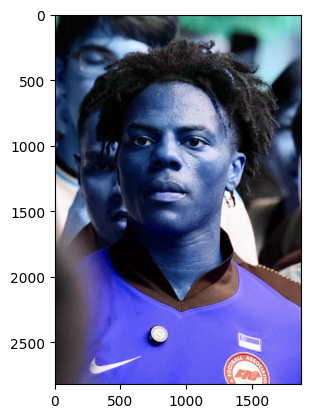

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2820, 1880)

In [7]:
gray

array([[167, 163, 160, ..., 199, 200, 205],
       [165, 159, 156, ..., 200, 198, 199],
       [161, 153, 152, ..., 202, 200, 200],
       ...,
       [ 41,  43,  45, ..., 102, 108, 105],
       [ 42,  43,  43, ..., 103, 111, 104],
       [ 43,  41,  39, ..., 103, 106, 103]],
      shape=(2820, 1880), dtype=uint8)

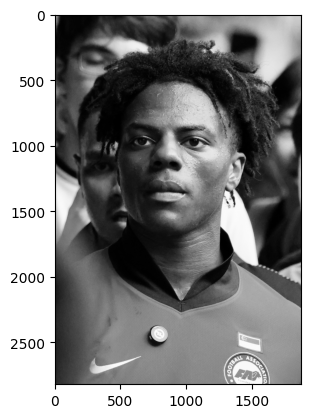

In [8]:
plt.imshow(gray, cmap="gray")

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[407, 582, 913, 913]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(407), np.int32(582), np.int32(913), np.int32(913))

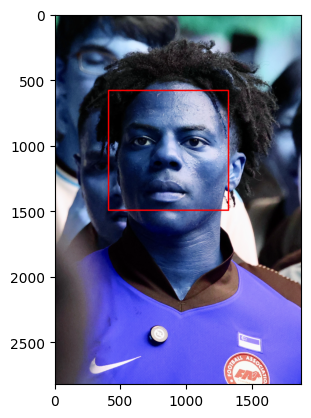

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255,0,0),10)
plt.imshow(face_img)

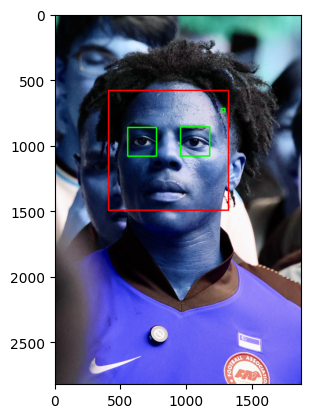

In [12]:
cv2.destroyAllWindows
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

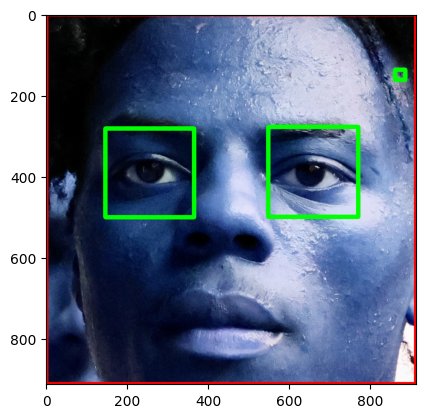

In [13]:
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_img_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.05, 3)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

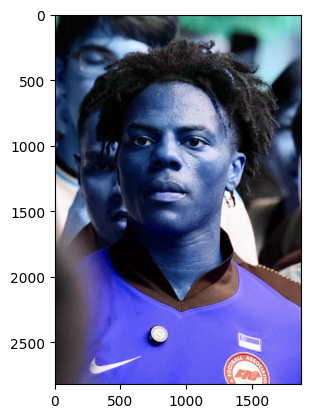

In [15]:
original_img = cv2.imread('./test_images/speed.jpg')
plt.imshow(original_img)

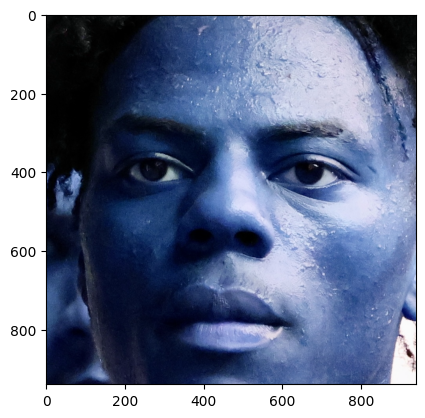

In [16]:
cropped_img = get_cropped_img_if_2_eyes('./test_images/speed.jpg')
plt.imshow(cropped_img)

# Creating directories and making automating the cropping and adding to folders process

I got my dataset from kaggle : https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset


In [17]:
path_to_data = "./dataset/"
path_to_crop_data = "./dataset/cropped/"

In [18]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/Tom_Hanks',
 './dataset/Sandra_Bullock',
 './dataset/Angelina_Jolie',
 './dataset/Natalie_Portman',
 './dataset/Megan_Fox',
 './dataset/Tom_Cruise',
 './dataset/Kate_Winslet',
 './dataset/Leonardo_DiCaprio',
 './dataset/Jennifer_Lawrence',
 './dataset/Brad_Pitt',
 './dataset/Scarlett_Johansson',
 './dataset/Hugh_Jackman',
 './dataset/Denzel_Washington',
 './dataset/Will_Smith',
 './dataset/Nicole_Kidman',
 './dataset/Robert_Downey_Jr']

In [20]:
import shutil
if os.path.exists(path_to_crop_data):
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] =[]

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images and placing them in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Tom_Hanks
Generating cropped images and placing them in folder:  ./dataset/cropped/Tom_Hanks
Sandra_Bullock
Generating cropped images and placing them in folder:  ./dataset/cropped/Sandra_Bullock
Angelina_Jolie
Generating cropped images and placing them in folder:  ./dataset/cropped/Angelina_Jolie
Natalie_Portman
Generating cropped images and placing them in folder:  ./dataset/cropped/Natalie_Portman
Megan_Fox
Generating cropped images and placing them in folder:  ./dataset/cropped/Megan_Fox
Tom_Cruise
Generating cropped images and placing them in folder:  ./dataset/cropped/Tom_Cruise
Kate_Winslet
Generating cropped images and placing them in folder:  ./dataset/cropped/Kate_Winslet
Leonardo_DiCaprio
Generating cropped images and placing them in folder:  ./dataset/cropped/Leonardo_DiCaprio
Jennifer_Lawrence
Generating cropped images and placing them in folder:  ./dataset/cropped/Jennifer_Lawrence
Brad_Pitt
Generating cropped images and placing them in folder:  ./dataset/cropped/Brad_Pit

Since we are going to feed these for model training, we have to assign numbers to them

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Tom_Hanks': 0,
 'Sandra_Bullock': 1,
 'Angelina_Jolie': 2,
 'Natalie_Portman': 3,
 'Megan_Fox': 4,
 'Tom_Cruise': 5,
 'Kate_Winslet': 6,
 'Leonardo_DiCaprio': 7,
 'Jennifer_Lawrence': 8,
 'Brad_Pitt': 9,
 'Scarlett_Johansson': 10,
 'Hugh_Jackman': 11,
 'Denzel_Washington': 12,
 'Will_Smith': 13,
 'Nicole_Kidman': 14,
 'Robert_Downey_Jr': 15}

### we are going to use the images in cropped folder for model training. we will use these raw images with wavelet transformed images to train our classifier.

In [23]:
import pywt

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H [0] *= 0 

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

In [24]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        # scale them all to the same size
        scaled_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [25]:
#ensure no warnings during training later
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape


(1391, 4096)

now that data cleaning is done, we can start to train our model
we will use gridsearch to try different models with different parameters and come out with the best fine tuned model

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [28]:
model_params = {
    'svm':{
        'model': SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [29]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5 , return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
df

/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/m

,model,best_score,best_params
0,svm,0.623247,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.340458,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.618439,{'logisticregression__C': 1}


In [30]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [31]:
best_estimators['svm'].score(X_test,y_test)

0.6781609195402298

In [32]:
best_estimators['random_forest'].score(X_test,y_test)

0.3103448275862069

In [33]:
best_estimators['logistic_regression'].score(X_test,y_test)

/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tanweiquan/Documents/Self Study- Machine Learning/Machine Learning Projects/2. Person Image Classification/model/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.6005747126436781

## as seen from the above, the best model to use would be SVM

time to save the model


In [34]:

import joblib

joblib.dump(best_estimators['svm'], 'saved_model.pkl')

['saved_model.pkl']

In [35]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

### Lets test the model

In [36]:
model_svm = best_estimators['svm']

In [37]:
def classify(img_path):
    cropped_img = get_cropped_img_if_2_eyes(img_path)
    scaled_img = cv2.resize(cropped_img,(32,32))
    img_har = w2d(cropped_img,'db1',5)
    scaled_img_har = cv2.resize(img_har, (32,32))
    combined_img = np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
    final = np.array(combined_img).reshape(1,4096).astype(float)
    
    
    return model_svm.predict(final)

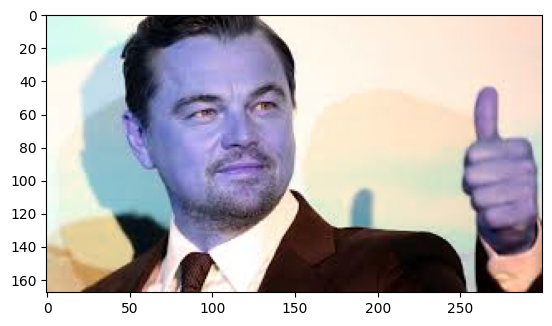

In [38]:
test_img = cv2.imread('./test_images/leo2.jpeg')
plt.imshow(test_img)

In [39]:
classify('./test_images/leo2.jpeg')

array([7])

In [40]:
class_dict

{'Tom_Hanks': 0,
 'Sandra_Bullock': 1,
 'Angelina_Jolie': 2,
 'Natalie_Portman': 3,
 'Megan_Fox': 4,
 'Tom_Cruise': 5,
 'Kate_Winslet': 6,
 'Leonardo_DiCaprio': 7,
 'Jennifer_Lawrence': 8,
 'Brad_Pitt': 9,
 'Scarlett_Johansson': 10,
 'Hugh_Jackman': 11,
 'Denzel_Washington': 12,
 'Will_Smith': 13,
 'Nicole_Kidman': 14,
 'Robert_Downey_Jr': 15}

As seen from the above, the classifier was able to classify the image to be leonardo dicaprio 